In [1]:
import k2movie
import astropy.units as u
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2
from tqdm import tqdm
import numpy as np
from scipy.signal import savgol_filter

In [2]:
kics=['212535880','212535581','212536306','212533660','212538611','212539059']

/Users/ch/K2/projects/k2movie/k2movie/k2movie.py:649: RuntimeWarning: invalid value encountered in log10
  ar=np.log10(ar)


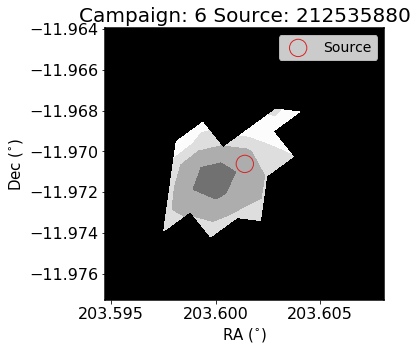

In [39]:
mov=k2movie.movie(name=kics[0],
                      campaign=6,
                      verbose=False,
                      data_dir='/Volumes/cupertino/database/',
                      cadence='all',
                      scale='log',
                      text=False,vmin=-20,vmax=20,colorbar=True,tol=6,cmap='Greys')
mov.cadence=np.arange(0,322*12,12)+10
fig,ax=plt.subplots(1,figsize=(5,5))
mov.inspect(ax)
fig.savefig('/Users/ch/Documents/Talks/Krill/supernova1.png',dpi=150,bbox_inches='tight')

In [40]:
mov.produce()
mov.populate()

Location and Target Name specified. Using Location


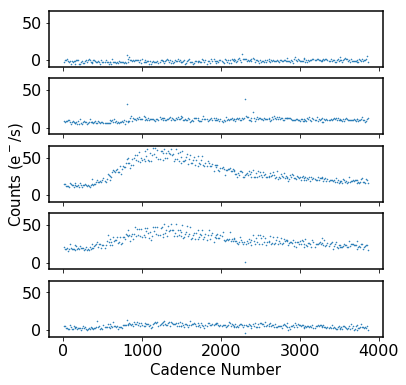

In [87]:
fig, ax = plt.subplots(5, figsize=(6,6),sharex=True,sharey=True)
for i in np.arange(1,6):
    ax[i-1].scatter(mov.cadence,mov.ar[i,3,:],s=0.3)
plt.xlabel('Cadence Number',fontsize=15)   
fig.text(0.05,0.5,'Counts (e$^-$/s)',rotation=90,fontsize=15, ha='center',va='center')
fig.savefig('/Users/ch/Documents/Talks/Krill/LC1.png',dpi=150,bbox_inches='tight')

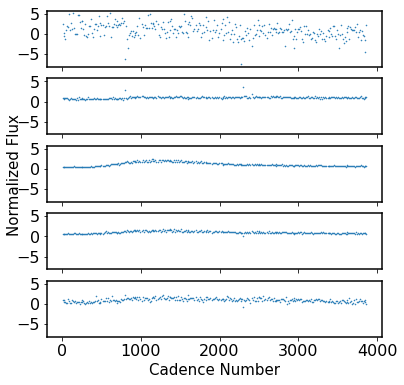

In [93]:
fig, ax = plt.subplots(5, figsize=(6,6),sharex=True,sharey=True)
for i in np.arange(1,6):
    ax[i-1].scatter(mov.cadence,mov.ar[i,3,:]/np.nanmedian(mov.ar[i,3,:]),s=0.3)
plt.xlabel('Cadence Number',fontsize=15)    
fig.text(0.05,0.5,'Normalized Flux',rotation=90,fontsize=15, ha='center',va='center')
fig.savefig('/Users/ch/Documents/Talks/Krill/LC2.png',dpi=150,bbox_inches='tight')

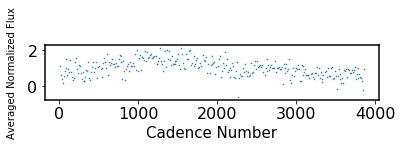

In [94]:
fig, ax = plt.subplots(1, figsize=(6,1))
for i in np.arange(1,6):
    if i == 1:
        x=mov.ar[i,3,:]/np.nanmedian(mov.ar[i,3,:])
    else:
        x+=mov.ar[i,3,:]/np.nanmedian(mov.ar[i,3,:])
x/=5
ax.scatter(mov.cadence,x,s=0.3)
plt.xlabel('Cadence Number',fontsize=15)    
fig.text(0.05,0.5,'Averaged Normalized Flux',rotation=90,fontsize=10, ha='center',va='center')
fig.savefig('/Users/ch/Documents/Talks/Krill/LC3.png',dpi=150,bbox_inches='tight')

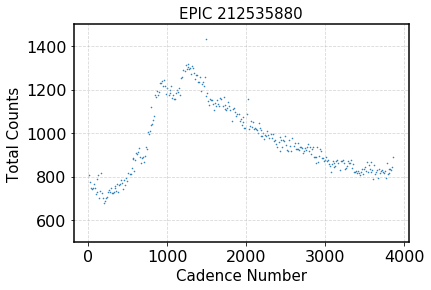

In [5]:
plt.scatter(mov.cadence,np.nansum(np.nansum(mov.ar,axis=0),axis=0),s=0.3)
plt.ylim(500,1500)
plt.grid(alpha=0.5,ls='--')
plt.ylabel('Total Counts',fontsize=15)
plt.xlabel('Cadence Number',fontsize=15)
plt.title('EPIC {}'.format(mov.name),fontsize=15)

#plt.savefig('/Users/ch/Documents/Talks/Krill/supernova2.png',dpi=150,bbox_inches='tight')

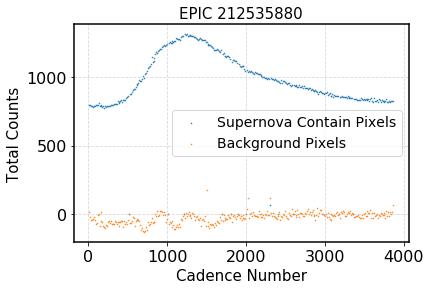

In [6]:
mask=mov.ar[:,:,104]>10
mask=np.asarray([mask for i in range(np.shape(mov.ar)[2])]).transpose(1,2,0)
plt.scatter(mov.cadence,np.nansum(np.nansum(mov.ar*mask,axis=0),axis=0),s=0.3,label='Supernova Contain Pixels')
plt.scatter(mov.cadence,np.nansum(np.nansum(mov.ar*~mask,axis=0),axis=0),s=0.3,label='Background Pixels')


#plt.ylim(500,1500)
plt.grid(alpha=0.5,ls='--')
plt.ylabel('Total Counts',fontsize=15)
plt.xlabel('Cadence Number',fontsize=15)
plt.title('EPIC {}'.format(mov.name),fontsize=15)
plt.legend()
#plt.savefig('/Users/ch/Documents/Talks/Krill/supernova3.png',dpi=150,bbox_inches='tight')

/Users/ch/K2/projects/k2movie/k2movie/k2movie.py:649: RuntimeWarning: invalid value encountered in log10
  ar=np.log10(ar)


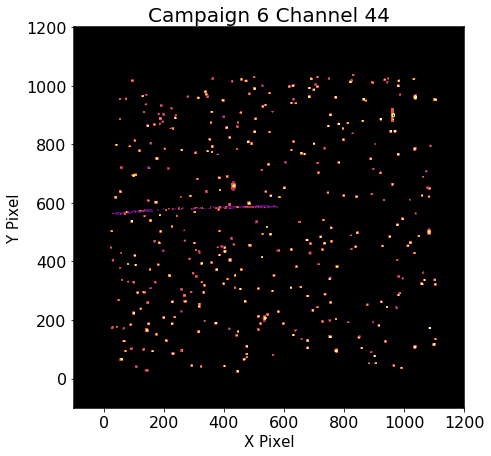

In [34]:
mov=k2movie.movie(loc=(550,550),
                      channel=[44],
                      campaign=6,
                      verbose=False,
                      data_dir='/Volumes/cupertino/database/',
                      cadence=[0],
                      scale='log',tol=650,cmap='inferno')

fig, ax = plt.subplots(1, figsize=(7,7))
mov.inspect(ax, radec=False, source=False)
ax.set_title('Campaign 6 Channel 44', fontsize=20)
fig.savefig('/Users/ch/Documents/Talks/Krill/field.png',dpi=150,bbox_inches='tight')

In [233]:
s = np.shape(mov.ar)
threshold=10
tol = 20

In [234]:
a = mov.ar[s[0]//2-tol:s[0]//2+tol,:,:]
b = mov.ar[:,s[1]//2-tol:s[1]//2+tol,:]

/Users/ch/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/Users/ch/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in multiply
  
/Users/ch/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/Users/ch/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/ch/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.
/Users/ch/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.


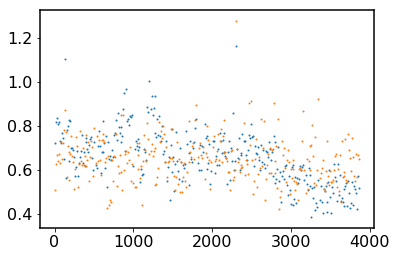

In [236]:
mask = (a<threshold)&(a!=0)
_ = plt.scatter(mov.cadence,np.nanmean(np.nanmean(a*mask,axis=0),axis=0),s=1)
mask = (b<threshold)&(b!=0)
_ = plt.scatter(mov.cadence,np.nanmean(np.nanmean(b*mask,axis=0),axis=0),s=1)

(-200, 200)

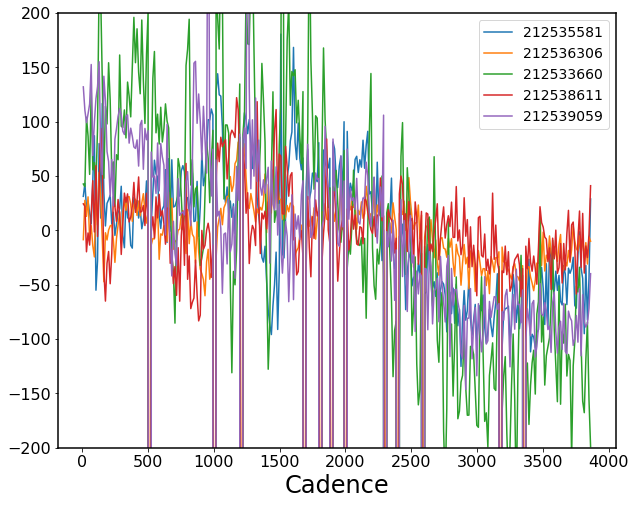

In [83]:
plt.figure(figsize=(10,8))
for kic in kics[1:]:
    mov=k2movie.movie(name=kic,
                      campaign=6,
                      verbose=False,
                      data_dir='/Volumes/cupertino/database/',
                      cadence='all',
                      scale='linear',
                      text=False,vmin=-20,vmax=20,colorbar=True,tol=6,cmap='inferno')
    mov.cadence=np.arange(0,322*12,12)+10
    mov.produce()
    mov.populate()
    mov.axes()
    mov.stabilize()
    bkg=np.asarray([mov.ar[:,:,0] for l in range(np.shape(mov.ar)[-1])]).transpose([1,2,0])
    dat=np.copy(mov.ar)
    x,y=mov.cadence,np.nansum(np.nansum(dat,axis=0),axis=0)
    y-=np.nanmedian(y)
    plt.plot(x,y,label=kic)
plt.xlabel('Cadence')
plt.legend()
plt.ylim(-200,200)

In [72]:
plt.figure(figsize=(10,8))
for i,kic in enumerate(kics):
    mov=k2movie.movie(name=kic,
                      campaign=6,
                      verbose=False,
                      data_dir='/Volumes/cupertino/database/',
                      cadence='all',
                      scale='linear',
                      text=False,vmin=-20,vmax=20,colorbar=True,tol=6,cmap='inferno')
    mov.cadence=np.arange(0,322*12,12)+10
    mov.produce()
    mov.populate()
    mov.axes()
    mov.stabilize()
    bkg=np.asarray([mov.ar[:,:,0] for l in range(np.shape(mov.ar)[-1])]).transpose([1,2,0])
    mov.ar-=bkg
    dat=np.copy(mov.ar)
    if i == 0:
        threshold=10
        cad=104
        mask=dat[:,:,cad]>threshold
        mask=np.asarray([mask for i in range(np.shape(dat)[2])]).transpose(1,2,0)
        dat*=~mask

    x,y=mov.cadence,np.nansum(np.nansum(dat,axis=0),axis=0)
    plt.plot(x,y+np.nanmedian(y)+i*400,label=kic)
plt.ylim(-400,(len(kics))*400)
plt.xlabel('Cadence')
plt.yticks([])
plt.legend()
plt.savefig('bumps.png',dpi=200,bbox_inches='tight')

NameError: name 'kics' is not defined

In [787]:
mov=k2movie.movie(name='212593538',
                  campaign=6,
                  verbose=True,
                  data_dir='/Volumes/cupertino/database/',
                  cadence='all',
                  scale='linear',
                  text=False,vmin=-20,vmax=20,colorbar=True,tol=6,cmap='inferno')
mov.cadence=np.arange(0,322*12,12)+10
mov.produce()
mov.populate()
mov.axes()
mov.stabilize()
bkg=np.asarray([mov.ar[:,:,0] for l in range(np.shape(mov.ar)[-1])]).transpose([1,2,0])
mov.ar-=bkg
dat=np.copy(mov.ar)
cad=70
threshold=10
mask=dat[:,:,cad]>threshold
mask=np.asarray([mask for i in range(np.shape(dat)[2])]).transpose(1,2,0)
dat*=mask

Initialised:
	Campaign: 6
	Channel: None
	Pixel Tolerance: 6
Finding None
	Querying MAST for 212593538


	Found :202.9629364013672 deg,-10.735147476196289 deg
Finding channels...
Channel: [61]
Finding location on focal plane
Creating data array
Switching to channel 61
Finished (3s)


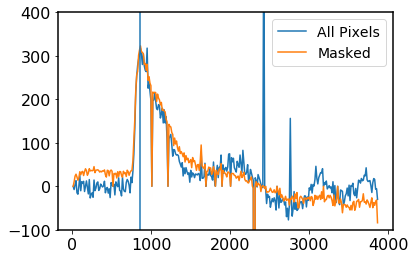

In [788]:
plt.plot(mov.cadence,np.nansum(np.nansum(mov.ar,axis=0),axis=0),label='All Pixels')
plt.plot(mov.cadence,np.nansum(np.nansum(dat,axis=0),axis=0),label='Masked')
plt.axvline(mov.cadence[cad])
plt.ylim(-100,400)
plt.legend()

In [601]:
mov.ar=dat

In [602]:
mov.movie()

Writing to movie
	Output file: 212535880.mp4
Saving...
Saved. (23s)


In [605]:
def restructure(campaign, channel, cadence=None):
    try:
        mov=k2movie.movie(loc=(500,500),
                          channel=[channel],
                          campaign=campaign,
                          verbose=False,
                          data_dir='/Volumes/cupertino/database/',
                          cadence='sixhour',
                          scale='linear',
                          text=False,vmin=-20,vmax=20,colorbar=True,tol=600,cmap='inferno')
        if (cadence is None) is False:
            mov.cadence = cadence
        mov.produce()
        mov.populate()
#        mov.axes()
#        mov.stabilize()
    except:
        return

    #bkg=np.asarray([mov.ar[:,:,0] for l in range(np.shape(mov.ar)[-1])]).transpose([1,2,0])
    #mov.ar-=bkg
    dat=np.copy(mov.ar)

    a = np.nanmean(dat,axis=2)
    locs=np.where(np.isfinite(a))
    a = a[np.isfinite(a)].ravel()

    pix = np.zeros((np.shape(locs)[1],np.shape(dat)[2]))
    for i,loc in enumerate(np.transpose(locs)):
        y=dat[loc[0],loc[1]]
        pix[i,:] = y
    return pix, locs

def colwise_trend(pix, locs):
    
    mpix=np.zeros((len(np.unique(locs[0])),np.shape(pix)[1]))
    x = np.arange(np.shape(pix)[1])
    for i,l in enumerate(np.unique(locs[0])):
        y2d = pix[locs[0]==l,:]
        y2d-=np.nanmin(y2d)
        y2d+=1
        y2d /= np.atleast_2d(np.nanmedian(y2d,axis=1)).T
        y=np.nanmean(y2d, axis=0)
        mpix[i] = y
    mpix/=np.transpose(np.atleast_2d(np.nanmedian(mpix,axis=1)))
    mpix/=np.atleast_2d(np.nanmedian(mpix,axis=0))
    return mpix


In [587]:
pix, locs = restructure(6, 44, cadence)

/Users/ch/K2/projects/k2movie/k2movie/k2movie.py:133: RuntimeWarning: invalid value encountered in subtract
  d = f[1:]-f[0:-1]
/Users/ch/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1308: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')
/Users/ch/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1313: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/Users/ch/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/ch/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: Mean of empty slice


In [606]:
mpix = colwise_trend(pix,locs)

/Users/ch/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: Mean of empty slice
/Users/ch/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:879: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanmedian1d, axis, a, overwrite_input)


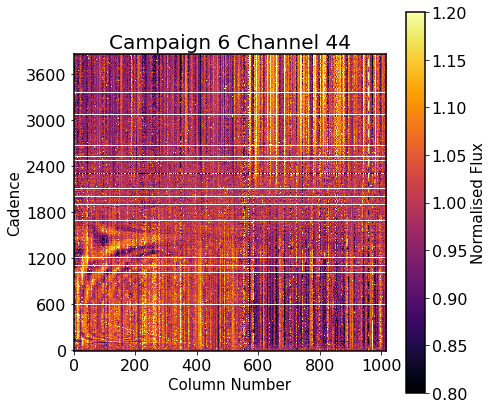

In [607]:
fig, ax = plt.subplots(1, figsize=(7,7))
cmap = plt.get_cmap('inferno')
plt.imshow(mpix.T,vmin=0.8,vmax=1.2, cmap=cmap,origin='bottom')
cbar=plt.colorbar()
cbar.set_label('Normalised Flux',fontsize=15)
plt.xlabel('Column Number',fontsize=15)
plt.ylabel('Cadence',fontsize=15)
ax.set_yticklabels((ax.get_yticks()*12).astype(int))
ax.set_aspect(3)
ax.set_title('Campaign {} Channel {}'.format(campaign,channel),fontsize=20)
plt.savefig('krilltest1.png',dpi=150,bbox_inches='tight')

In [608]:
cpix = np.copy(mpix)*np.nan
npoly = 3
polys = np.zeros((len(cpix),npoly+1))
for i,m in enumerate(mpix):
    x = np.arange(len(m))
    ok = np.where(np.isfinite(m)&(np.abs(m-1)<4*np.nanstd(m)))[0]
    if len(ok)==0:
        continue
    line = np.polyval(np.polyfit(x[ok],m[ok],npoly),x)
    ok = np.where(np.isfinite(m)&(np.abs(m-1)<3*np.nanstd(m))&(np.abs(m-line)<5*np.nanstd(m-line)))[0]
    if len(ok)==0:
        continue
    polys[i,:]=np.polyfit(x[ok],m[ok],npoly)
    line = np.polyval(polys[i,:],x)
    cpix[i,ok]=m[ok]/line[ok]


/Users/ch/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  
/Users/ch/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.


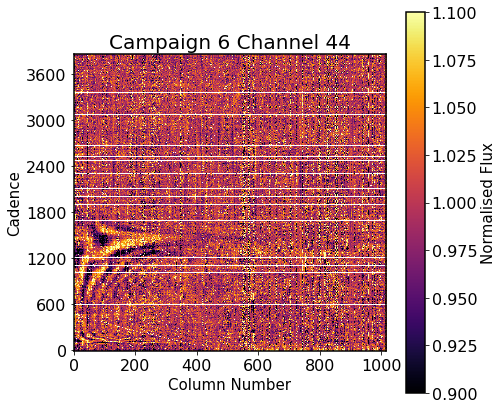

In [610]:
fig, ax = plt.subplots(1, figsize=(7,7))
cmap = plt.get_cmap('inferno')
plt.imshow(cpix.T,vmin=0.9,vmax=1.1, cmap=cmap,origin='bottom')
cbar=plt.colorbar()
cbar.set_label('Normalised Flux',fontsize=15)
plt.xlabel('Column Number',fontsize=15)
plt.ylabel('Cadence',fontsize=15)
ax.set_yticklabels((ax.get_yticks()*12).astype(int))
ax.set_aspect(3)
ax.set_title('Campaign {} Channel {}'.format(campaign,channel),fontsize=20)
plt.savefig('krilltest2.png',dpi=150,bbox_inches='tight')

In [616]:
from astropy.stats import LombScargle
import astropy.units as u

In [726]:
f = np.linspace(1./(0.01*u.day).to(u.min),1./(40.*u.day).to(u.min),200)
par = np.zeros((len(pix),len(f)))
for i,p in enumerate(pix):
    ok = np.isfinite(p)
    par[i,:]=LombScargle(x[ok],p[ok],dy=1).power(f)

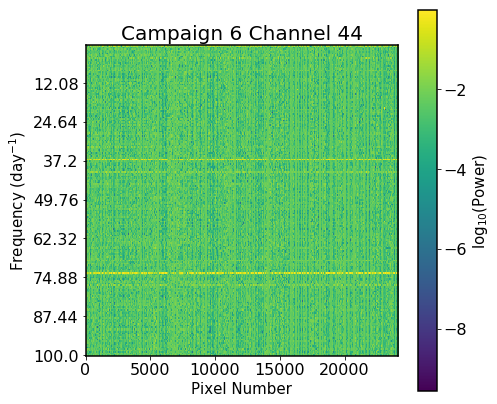

In [727]:
fig = plt.figure(figsize=(7,7))
plt.imshow(np.log10(par).T,origin='bottom')
plt.gca().set_aspect(120)
yt = plt.gca().get_yticks()
_=plt.gca().set_yticklabels(np.round(np.interp(yt,np.arange(len(f)),f.to(1./u.day)),2))
plt.ylabel('Frequency (day$^{-1})$',fontsize=15)
plt.xlabel('Pixel Number',fontsize=15)
plt.title('Campaign {} Channel {}'.format(campaign,channel),fontsize=20)
cbar = plt.colorbar()
cbar.set_label('log$_{10}$(Power)',fontsize=15)

/Users/ch/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


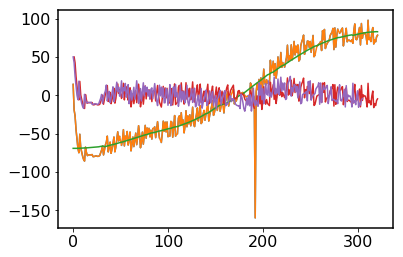

In [309]:
#plt.plot(mpix[30,:])
n=20
y = np.copy(mpix[n,:])
bad=np.where(np.abs(y)>5*np.nanstd(y))[0]
y[bad]=np.nan
ok=np.where((np.isfinite(y)))[0]
plt.plot(y)
plt.plot(ok,y[ok])
line=savgol_filter(y[ok],301,5,mode='mirror')
plt.plot(ok,line)
bad=np.where(np.abs(y[ok]-line)>4*np.nanstd(y[ok]-line))[0]
y[ok[bad]]=np.nan
plt.plot(ok,y[ok]-line)
ok=np.where((np.isfinite(y)))[0]
line=savgol_filter(y[ok],501,5,mode='mirror')
y[ok]-=line
plt.plot(y[ok])



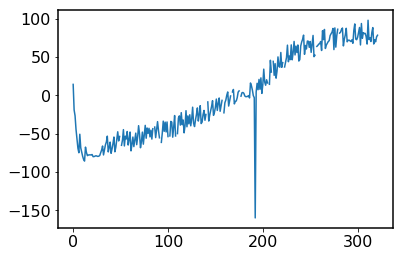

In [292]:
plt.plot(y)

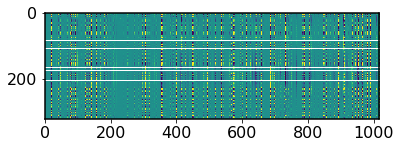

In [152]:
plt.imshow(mpix.T,vmin=-100,vmax=100)

In [59]:
campaign=6
channel=44
mov=k2movie.movie(loc=(500,500),
                          channel=[channel],
                          campaign=campaign,
                          verbose=False,
                          data_dir='/Volumes/cupertino/database/',
                          cadence='sixhour',
                          scale='linear',
                          text=False,vmin=-20,vmax=20,colorbar=True,tol=600,cmap='inferno')
cadence = mov.cadence

In [25]:
mov=k2movie.movie(loc=(500,500),
                  channel=[44],
                  campaign=5,
                  verbose=False,
                  data_dir='/Volumes/cupertino/database/',
                  cadence='sixhour',
                  scale='linear',
                  text=False,vmin=-20,vmax=20,colorbar=True,tol=200,cmap='inferno')
mov.produce()
mov.populate()


/Users/ch/K2/projects/k2movie/k2movie/k2movie.py:133: RuntimeWarning: invalid value encountered in subtract
  phase = np.argmin(std)
/Users/ch/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1308: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')
/Users/ch/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/Users/ch/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4016: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)
/Users/ch/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1313: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


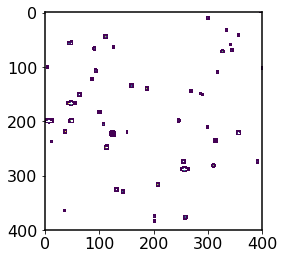

In [27]:
plt.imshow(mov.ar[:,:,0])

In [44]:
a = np.nanmedian(mov.ar,axis=2)
locs = np.where(np.isfinite(a))

#Column
s = np.argsort(locs[0])
#Row
s = np.argsort(locs[1])
# Median brightness of pixel
s = np.argsort(a[locs[0],locs[1]])
locs = locs[0][s],locs[1][s]

ar = np.asarray([mov.ar[l[0],l[1],:]/a[l[0],l[1]] for l in np.transpose(locs)])

/Users/ch/anaconda/lib/python3.6/site-packages/numpy/lib/function_base.py:4016: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


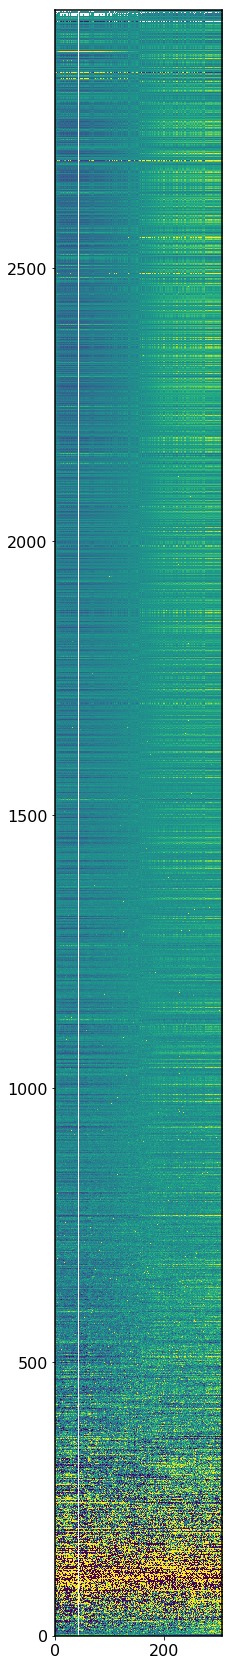

In [46]:
plt.figure(figsize=(3,30,))
plt.imshow(ar,vmin=0,vmax=2,origin='bottom')

In [341]:
std = np.zeros(12)
for i, phase in enumerate(np.arange(12)):
    fc = np.arange(0,np.shape(ar)[1],12) + phase
    fc = fc[np.where((fc>=0)&(fc<np.shape(ar)[1]))[0]]
    d = ar[:,fc][1:]-ar[:,fc][0:-1]
    std[i] = np.nanmedian(np.nanstd(d,axis=1))


/Users/ch/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in subtract
  """
/Users/ch/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1308: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')


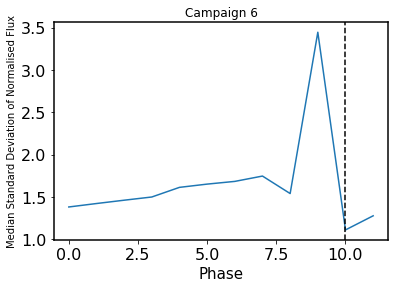

In [375]:
plt.plot(np.arange(12), std)
plt.xlabel('Phase',fontsize=15)
plt.ylabel('Median Standard Deviation of Normalised Flux',fontsize=10)
plt.title('Campaign {}'.format(mov.campaign))
plt.axvline(np.argmin(std),c='black',ls='--')
phase = np.argmin(std)
fc = np.arange(0,np.shape(mov.ar)[-1],12)+phase
fc = fc[np.where((fc>=0)&(fc<np.shape(ar)[1]))[0]]

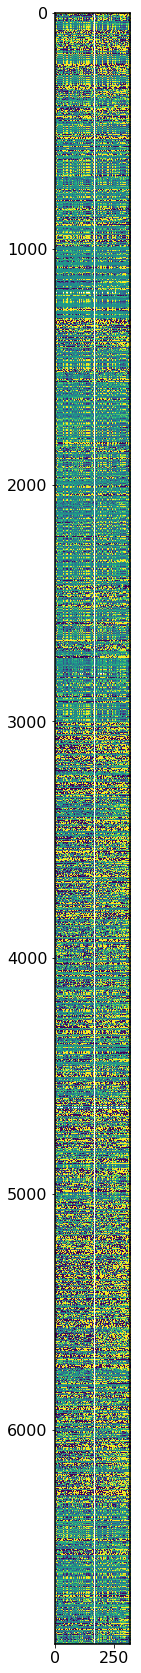

In [376]:
plt.figure(figsize=(3,30,))
plt.imshow(ar[:,fc],vmin=0,vmax=2)

/Users/ch/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1308: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')
/Users/ch/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


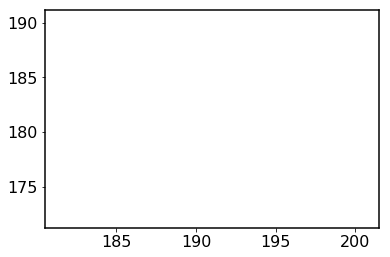

In [393]:
plt.plot(np.nanstd(ar[:,fc],axis=0))

In [396]:
np.nanstd(ar[:,fc],axis=0)

/Users/ch/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1308: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')
/Users/ch/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


array([         nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,
                nan,          nan,          nan,       

In [401]:
print(np.nanmean(ar[:,fc],axis=0))

[        inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf         inf         inf
         nan         inf         inf         inf         inf         inf
         inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf         inf         inf
         inf         inf         inf         inf   

/Users/ch/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [22]:
mov.calc_6hour()

/Users/ch/K2/projects/k2movie/k2movie/k2movie.py:133: RuntimeWarning: invalid value encountered in subtract
  phase = np.argmin(std)
/Users/ch/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1308: RuntimeWarning: invalid value encountered in subtract
  np.subtract(arr, avg, out=arr, casting='unsafe')
/Users/ch/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1313: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)
/Users/ch/anaconda/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1427: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


array([   0,   12,   24,   36,   48,   60,   72,   84,   96,  108,  120,
        132,  144,  156,  168,  180,  192,  204,  216,  228,  240,  252,
        264,  276,  288,  300,  312,  324,  336,  348,  360,  372,  384,
        396,  408,  420,  432,  444,  456,  468,  480,  492,  504,  516,
        528,  540,  552,  564,  576,  588,  600,  612,  624,  636,  648,
        660,  672,  684,  696,  708,  720,  732,  744,  756,  768,  780,
        792,  804,  816,  828,  840,  852,  864,  876,  888,  900,  912,
        924,  936,  948,  960,  972,  984,  996, 1008, 1020, 1032, 1044,
       1056, 1068, 1080, 1092, 1104, 1116, 1128, 1140, 1152, 1164, 1176,
       1188, 1200, 1212, 1224, 1236, 1248, 1260, 1272, 1284, 1296, 1308,
       1320, 1332, 1344, 1356, 1368, 1380, 1392, 1404, 1416, 1428, 1440,
       1452, 1464, 1476, 1488, 1500, 1512, 1524, 1536, 1548, 1560, 1572,
       1584, 1596, 1608, 1620, 1632, 1644, 1656, 1668, 1680, 1692, 1704,
       1716, 1728, 1740, 1752, 1764, 1776, 1788, 18